✍ В этом юните мы разберём принцип решения задачи снижения размерности, а также рассмотрим один из алгоритмов, который используется для этой цели, — **PCA (Principal Component Analysis, метод главных компонент)**.

Размерность данных отражает количество содержащихся в них признаков. Если признаков очень много, можно столкнуться с **проклятием размерности**.

## **Проклятие размерности** — это проблема, связанная с экспоненциальным возрастанием объёма данных из-за увеличения размерности пространства.

Если размерность данных слишком велика, их обработка занимает чрезвычайно много времени, а их хранение требует большого объёма памяти, что, конечно, в целом затрудняет процесс работы. Поэтому количество признаков в данных необходимо уменьшить. Как это сделать?

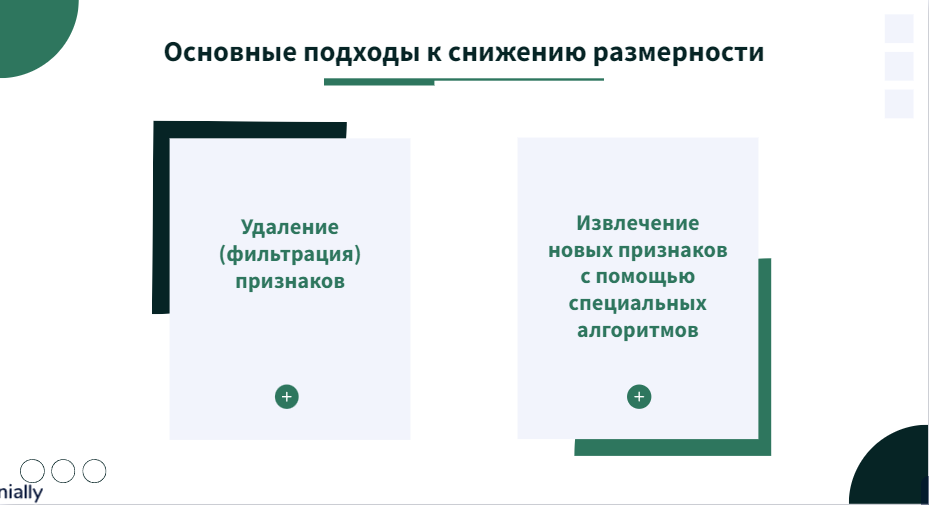

+ Удаление признаков может быть подходящим вариантом, когда, например, в них есть некорректные данные или так много пропусков, что эту информацию нельзя использовать для построения модели. Иногда удаляют малоинформативные признаки, которые принимают одни и те же значения или у которых очень слабая корреляция с целевой переменной. Есть и более сложные методы фильтрации — сейчас мы не будем на них останавливаться, однако обратим ваше внимание, что при удалении признаков мы практически всегда теряем какую-то информацию о данных.

+ Создание новых признаков не даёт потерять важную информацию. Допустим, в нашем наборе данных есть 100 признаков. При извлечении признаков мы отказываемся от старых и создаём 100 новых независимых (таких, между которыми коэффициент корреляции равен нулю). Каждый новый признак представляет собой комбинацию старых. Независимые новые признаки определяются специальным алгоритмом (например, PCA) и упорядочиваются  по тому, насколько хорошо они сохраняют информацию о данных. После этого можно отбросить наименее важные новые признаки в зависимости от того, какую объяснённую дисперсию необходимо сохранить: допустим, первые 80 признаков из извлечённых 100 объясняют 95 % дисперсии и нас устраивает такой процент. Значит, мы отбрасываем последние 20 новых признаков. В результате множества исследований было выявлено, что такое отбрасывание части новых признаков совершенно не мешает получать модели машинного обучения, которые будут показывать высокую эффективность. Например, для распознавания лиц достаточно использовать лишь треть извлечённых из фотографий признаков, а для обнаружения лактозы в безлактозном молоке NIR-спектроскопией будет достаточно извлечь с помощью PCA всего лишь два признака из 601.

Представим, что мы хотим описать форму рыбы. Это можно сделать, например, с помощью её высоты (height) и длины (length):

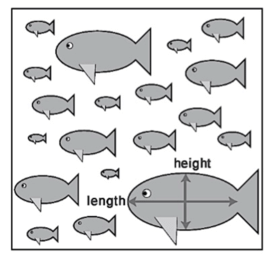

Однако, разумеется, эти признаки не являются независимыми друг от друга и довольно сильно коррелируют. Зная одно измерение для рыбы, мы, скорее всего, сможем предсказать по нему второе, то есть, по сути, мы можем описать форму рыбы с помощью только одного показателя. Причём важно отметить, что, когда мы говорим про один показатель, мы не отбрасываем длину рыбы или её высоту — вместо этого мы преобразуем эти два исходных признака в две ортогональные (независимые) компоненты, которые полностью описывают форму рыбы:

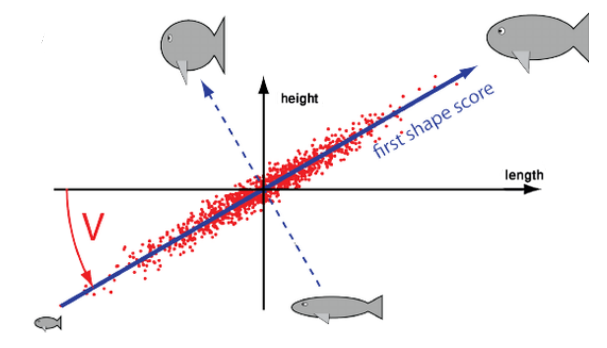


Первая компонента (сплошная синяя стрелка) объясняет бόльшую часть вариации данных, а вторая (пунктирная синяя стрелка) — оставшуюся часть вариации. Обе они являются производными от высоты и длины.

На интуитивном уровне первую компоненту можно рассматривать как наиболее подходящий для описания данных вектор, который сводит к минимуму потерю информации. С другой стороны, её также можно рассматривать как линию, максимизирующую вариацию. В целом, если первая компонента объясняет достаточный для нас процент дисперсии, мы можем «отбросить» вторую.

Итак, в PCA признаки преобразуются в новый набор переменных с меньшим (или таким же) количеством измерений, сохраняя при этом как можно больше вариаций, присутствующих в наборе данных. Геометрически это значит, что метод главных компонент ищет гиперплоскость заданной размерности, при проекции на которую сумма квадратов расстояний от исходных точек будет минимальной. Это проиллюстрировано на анимации ниже:

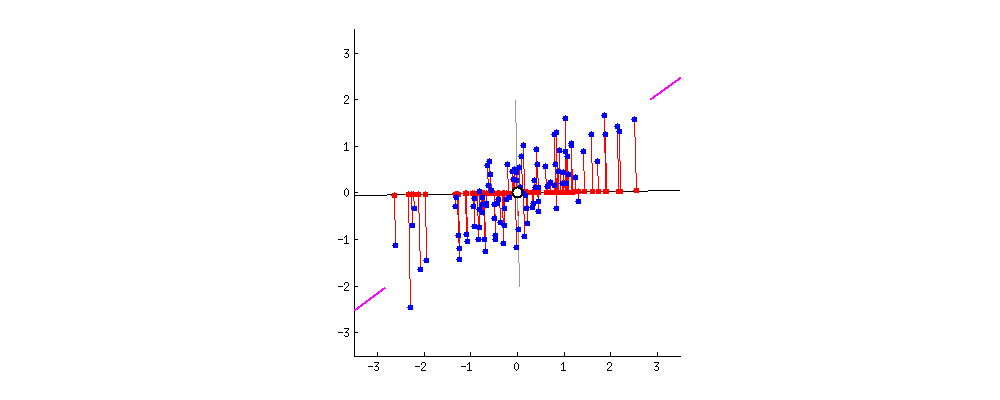

Здесь мы хотим преобразовать два признака в один и ищем такой наклон прямой (новой компоненты), чтобы её сумма квадратов отклонений от объектов была минимальной.

## **АЛГОРИТМ РЕАЛИЗАЦИИ PCA**

1. Стандартизировать данные.
2. Рассчитать ковариационную матрицу для объектов.
3. Рассчитать собственные значения и собственные векторы для ковариационной матрицы.
4. Отсортировать собственные значения и соответствующие им собственные векторы.
5. Выбрать  наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.
6. Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.

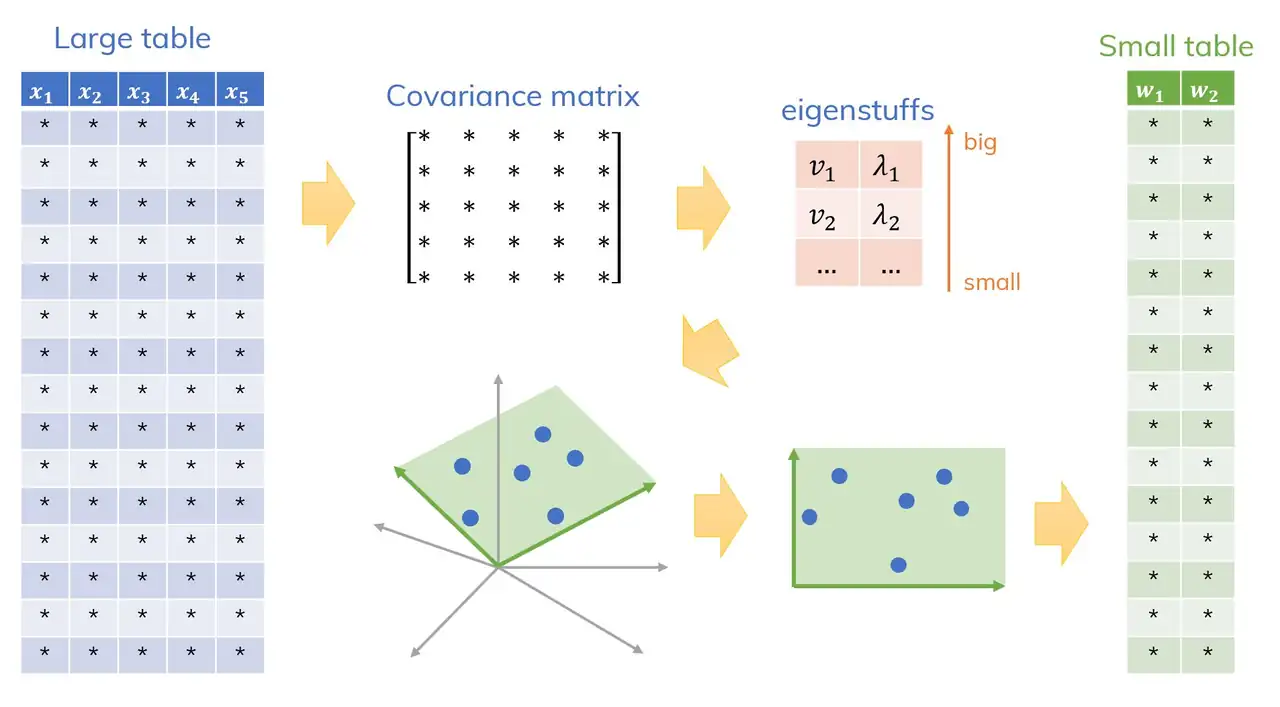



Рассмотрим все шаги на примере.

Допустим, у нас есть набор данных, состоящий из четырёх признаков:

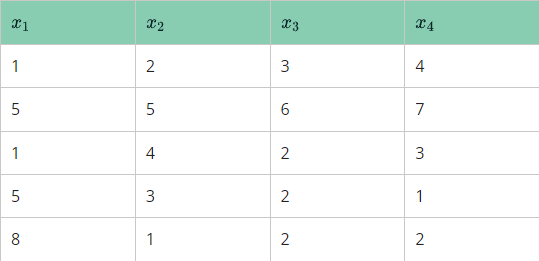

Мы хотим сократить количество измерений до двух.

На первом шаге необходимо стандартизировать данные. Это делается по следующей формуле:

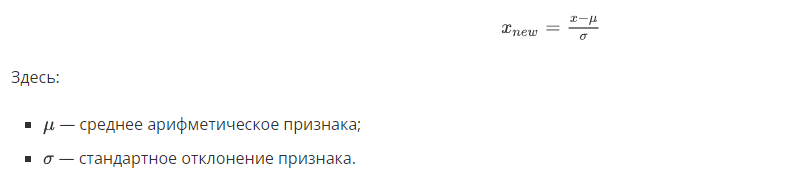

Давайте рассчитаем показатели средних арифметических и стандартных отклонений для наших признаков. Начнём с признака $x_1$:

+ Для признака $x_1$ среднее арифметическое будет вычисляться так:

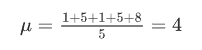

+ Для расчёта стандартного отклонения для $x_1$ необходимо вычислить все отклонения значений от среднего — они будут равняться:

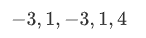

Возведём их в квадрат:

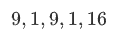

После этого разделим сумму квадратов на значение «объём выборки минус один» (так как мы ищем значения для выборки, а не для генеральной совокупности), чтобы получить дисперсию:

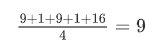

Извлечём корень, чтобы получить стандартное отклонение:

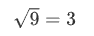



Аналогичные вычисления сделаем и для других признаков — получим следующие результаты:

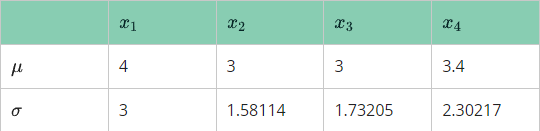

Теперь будем стандартизировать все имеющиеся у нас значения. Например, для первого значения признака $x_1$ получим следующее:

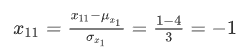

Здесь за $x_11$ обозначено значение первого признака для первого объекта.

Для всех остальных значений произведём аналогичные вычисления и получим следующую таблицу:

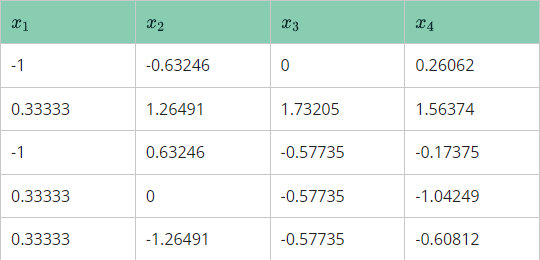

Разумеется, все эти значения не требовалось вычислять самостоятельно. Код для их расчёта в Python будет следующим:

In [12]:
import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())
df_std

,x1,x2,x3,x4
0,-1.000000,-0.632456,0.000000,0.260623
1,0.333333,1.264911,1.732051,1.563740
2,-1.000000,0.632456,-0.577350,-0.173749
3,0.333333,0.000000,-0.577350,-1.042493
4,1.333333,-1.264911,-0.577350,-0.608121


Перейдём ко второму шагу. Теперь нам необходимо вычислить ковариационную матрицу для наших стандартизированных данных. Для этого будем пользоваться следующей формулой:

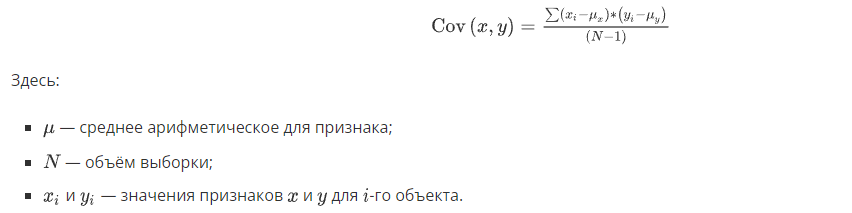

Нам будут нужны все попарные ковариации, а ковариация переменной с самой собой — это дисперсия:

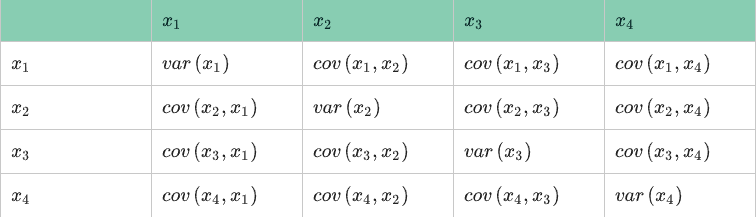

Так как мы стандартизировали данные, то для каждого признака среднее арифметическое равно $0$, а стандартное отклонение равно $1$. Значит, все дисперсии также равны $1$.

Вычислим ковариацию для признаков $x_1$ и $x_2$. Для этого сложим все произведения отклонений значений от средних и разделим получившуюся сумму на число «количество объектов минус один»:

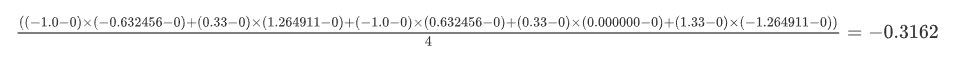

Аналогичным образом можно вычислить другие ковариации — результатом станет приведённая ниже матрица ковариаций:

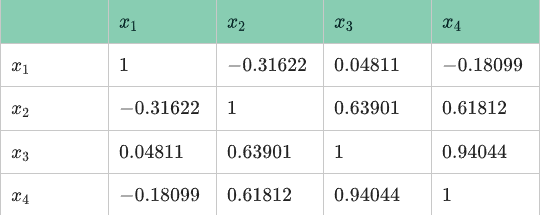

Разумеется, эти вычисления можно было реализовать с помощью Python следующим образом:

In [3]:
cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

Следующим шагом нам необходимо вычислить собственные значения и собственные векторы для матрицы. Для этого надо решить уравнение:

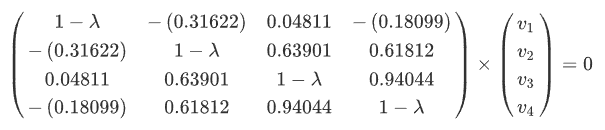

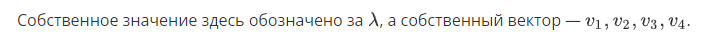

Получится несколько собственных векторов, которые будут удовлетворять этому условию (т.е., по сути, четыре решения нашего уравнения):

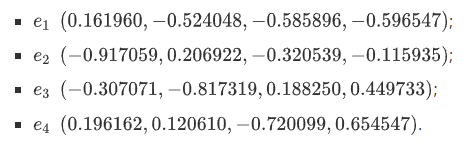

С помощью Python их можно было бы найти следующим образом:

In [6]:
eigen_val, eigen_vectors = np.linalg.eig(cov_mat)
display(eigen_val, eigen_vectors)

array([2.51579324, 1.0652885 , 0.39388704, 0.02503121])

array([[ 0.16195986, -0.91705888, -0.30707099,  0.19616173],
       [-0.52404813,  0.20692161, -0.81731886,  0.12061043],
       [-0.58589647, -0.3205394 ,  0.1882497 , -0.72009851],
       [-0.59654663, -0.11593512,  0.44973251,  0.65454704]])

Теперь нам необходимо выбрать два собственных вектора, так как в итоге мы хотим получить две компоненты. Нужно взять векторы с наибольшими собственными значениями. При нахождении собственных векторов в Python они выводятся в соответствии с убыванием соответствующих собственных значений, поэтому берём первые два вектора:

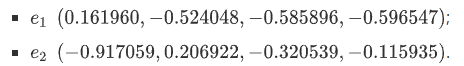

Осталось только найти главные компоненты. Для этого перемножаем матрицу стандартизированных признаков на матрицу с собственными векторами и получаем матрицу главных компонент:

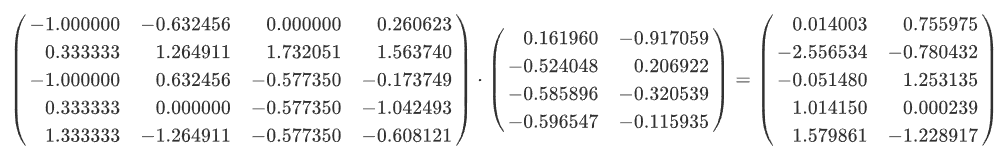

Таким образом, мы получили две главных компоненты. Можно проверить, получили ли бы мы тот же результат, если бы воспользовались сразу готовым алгоритмом на Python — PCA.

В параметр n_components в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем n_components = 0.9.

In [8]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.40033078e-02,  7.55974765e-01],
       [ 2.55653399e+00, -7.80431775e-01],
       [ 5.14801919e-02,  1.25313470e+00],
       [-1.01415002e+00,  2.38808310e-04],
       [-1.57986086e+00, -1.22891650e+00]])

Мы получили ровно такие же результаты. Разумеется, в будущем при решении практических задач вы сможете сразу использовать алгоритм PCA, не реализуя вручную всю последовательность действий.

## Задание 5.1

Найдите матрицу ковариаций для векторов $(3, 4, 1)$ и $(1, 6, 2)$. В качестве ответа укажите сумму всех значений матрицы, округлённую до двух знаков после точки-разделителя.

In [9]:
np.cov(np.array([3,4,1]),np.array([1,6,2])).sum()

14.333333333333334

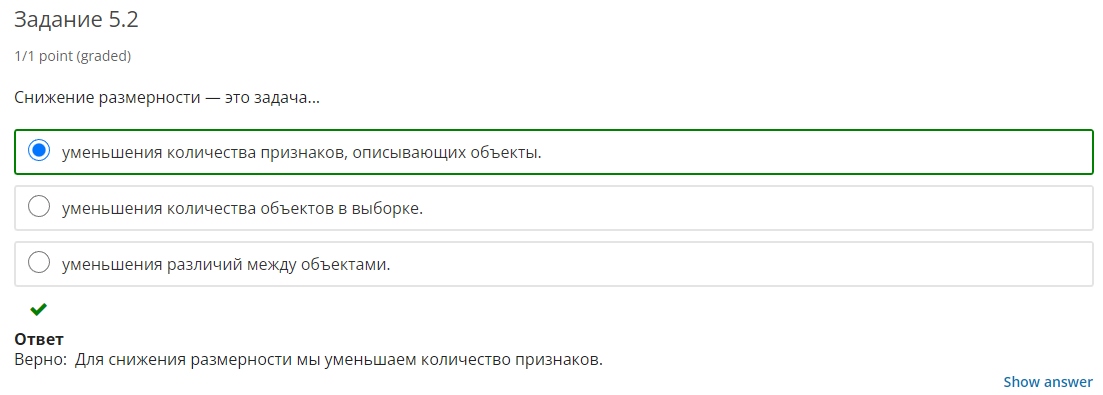

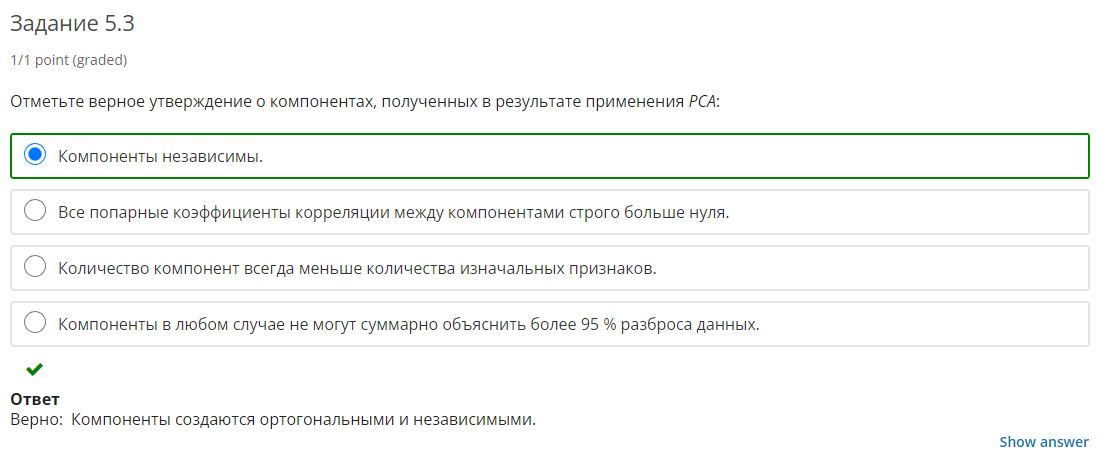

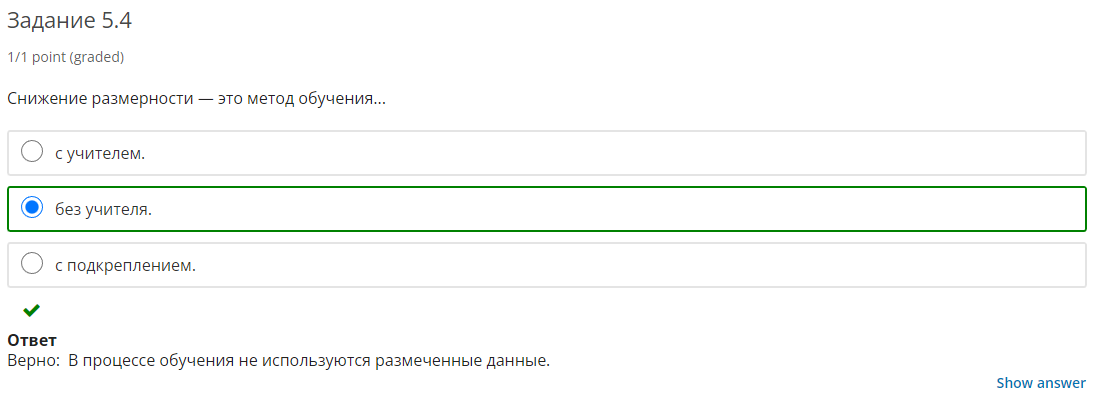

## Задание 5.5

Дана матрица признаков:



```
B = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
```
Какое минимальное количество главных компонент надо выделить, чтобы сохранить информацию о как минимум 90 % разброса данных?


In [11]:
B = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
 
df = pd.DataFrame(B)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)
principalComponents

array([[-1.61145254,  1.76368007,  0.01320928],
       [ 2.08441051,  1.01724955, -0.24417084],
       [-0.29568142, -0.95946326, -0.05272576],
       [-0.50390826, -1.24373821, -0.50808763],
       [ 0.3266317 , -0.57772816,  0.79177495]])

⭐ В этом юните мы разобрали один из методов снижения размерности — PCA: мы рассмотрели все этапы его реализации и смогли уменьшить количество признаков в нашем примере с четырёх до двух. В следующем юните мы рассмотрим ещё один метод, используемый для снижения размерности, — SVD. По сути, SVD — более общий алгоритм, из которого можно получить в том числе и PCA.